IMPORTING NECESSARY LIBRARIES 

In [29]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import geopandas as gpd 
import rasterio
import folium
import plotly.express as px

LOADING THE GIS DATA

In [30]:
#Climate Data(seasonal and annual climate change trends in Nepal of 75 district  )
path_for_district_data=r"C:\\Users\\Dell\\Desktop\\Omdena\\gis_assignment\\Data\\district_data.geojson" 


#loading the district data 
district_data=gpd.read_file(path_for_district_data)

#Printing first few rows of the data (Default value being 5)
print(district_data.head())

#Summary of the Data
print(district_data.info())

#Satistical summary of the Data 
print(district_data.describe())


                Precipitaton (mm)(Winter) Precipitaton (mm)(Pre-monsoon)  \
0     Districts                    Winter                    Pre-monsoon   
1        Achham        109.90000000000001             166.69999999999999   
2  Arghakhanchi                      57.5             141.69999999999999   
3       Baglung        62.399999999999999             186.59999999999999   
4       Baitadi        107.09999999999999                          203.5   

  Precipitaton (mm)(monsoon) Precipitaton (mm)(Post-monsoon)  \
0                    monsoon                    Post-monsoon   
1         1051.4000000000001              51.399999999999999   
2                       1367              61.399999999999999   
3         1610.4000000000001                              59   
4         1110.0999999999999              51.899999999999999   

  Precipitaton (mm)(Annual) Maximum Temperature (C)(Winter)  \
0                    Annual                          Winter   
1                      1379     

In [31]:
#Climate Data(seasonal and annual climate change trends in Nepal for physiographic regions )
path_for_physiographic_data=r"C:\\Users\\Dell\\Desktop\\Omdena\\gis_assignment\\Data\\physiographic_data.geojson"

#Loading the required data 
physiographic_data=gpd.read_file(path_for_physiographic_data)

#Printing first few rows of the data (Default value being 5)
print(physiographic_data.head())

#Summary of the Data
print(physiographic_data.info())

#Satistical summary of the Data 
print(physiographic_data.describe())

                        Precipitation (mm)(Winter)  \
0  Physiographic Region                     Winter   
1        High Himalayas         49.600000000000001   
2        High Mountains         72.599999999999994   
3          Mid Mountain         60.200000000000003   
4              Siwaliks                         52   

  Precipitation (mm)(Pre-monsoon) Precipitation (mm)(monsoon)  \
0                    Pre- monsoon                     monsoon   
1              105.40000000000001          502.89999999999998   
2              202.69999999999999                      1189.8   
3              212.90000000000001                      1292.7   
4              160.90000000000001                      1426.3   

  Precipitation (mm)(Post-monsoon) Precipitation (mm)(Annual)  \
0                     Post-monsoon                     Annual   
1                             36.5         694.20000000000005   
2               62.899999999999999         1527.9000000000001   
3               61.70000

In [32]:
#Shapefile of the districts of Nepal 

path_of_shapefile=r"C:\\Users\\Dell\\Desktop\\Omdena\\gis_assignment\\Data\\District\\District.shp"

#Loafing the data 

shapefile_data=gpd.read_file(path_of_shapefile)

#Printing first few rows of the data (Default value being 5)
print(shapefile_data.head())

#Summary of the Data
print(shapefile_data.info())

#Satistical summary of the Data 
print(shapefile_data.describe())

   OBJECTID          State  State_Code   District  \
0      5439        Karnali           6      DOLPA   
1      3182        Lumbini           5      GULMI   
2      3707        Bagmati           3  KATHMANDU   
3      5276  Sudurpashchim           7    KAILALI   
4      1341        Lumbini           5    PYUTHAN   

                             Center  Area_SQKM  \
0                              None   786.2029   
1                        Purkotdaha     7.1017   
2  Gokarneshwor Municipality Office     7.0128   
3            Durgauli Gabisa Bhawan    14.0281   
4                              Puja    28.4556   

                                            geometry  
0  POLYGON ((91138.076 3196071.101, 91131.738 319...  
1  POLYGON ((126458.914 3111104.755, 126420.917 3...  
2  POLYGON ((330182.734 3052935.622, 330172.338 3...  
3  POLYGON ((-118546.229 3182243.058, -118535.005...  
4  POLYGON ((89734.088 3093838.21, 89693.709 3093...  
<class 'geopandas.geodataframe.GeoDataFrame'>
Rang

INTERACTIVE FOLIUM MAP OF NEPAL SHOWING DIFFERENT DISTRICTS

In [ ]:
#Interactive folium map of different districts of Nepal where the climate trend is analyzed

# Check for column names
print("Columns in dataset:", shapefile_data.columns)

# Ensure geometry is valid
shapefile_data = shapefile_data[shapefile_data.geometry.notna()]
shapefile_data = shapefile_data.to_crs(epsg=4326)  # Convert to correct CRS

# Create Folium Map
map = folium.Map(location=[28.3949, 84.1240], zoom_start=7)

# Add District Boundaries
folium.GeoJson(
    shapefile_data,
    name="Nepal Districts",

     fillColor= 'lightblue', #District color
     color='black',         #Border color
     weight= 1,              #Border thickness
     fillOpacity= 0.5        # Transparency

).add_to(map)

# Add District Labels
for _, row in shapefile_data.iterrows():
    if row.geometry is not None:
        centroid = row.geometry.centroid   # Get centroid
        folium.Marker(
            location=[centroid.y, centroid.x],     # Latitude, Longitude
            popup=row.get("District", "Unknown"),  # Show district name on click
            tooltip=row.get("District", "Unknown"), # Show district name on hover
            icon=folium.Icon(color="blue", icon="info-sign")
        ).add_to(map)

# Add Layer Control
folium.LayerControl().add_to(map)

# Save & Show Map
map.save("nepal_district_map_with_labels_v3.html")
map



VISUALIZATION OF GIS DATA

Data cleaning must be done prior to the visualization

In [33]:
#Data cleaning for the visualization of difeerent plots showing climate treands 

district_data.columns = [
    "District", "Precip_Winter", "Precip_PreMonsoon", "Precip_Monsoon", "Precip_PostMonsoon", "Precip_Annual",
    "MaxTemp_Winter", "MaxTemp_PreMonsoon", "MaxTemp_Monsoon", "MaxTemp_PostMonsoon", "MaxTemp_Annual",
    "MinTemp_Winter", "MinTemp_PreMonsoon", "MinTemp_Monsoon", "MinTemp_PostMonsoon", "MinTemp_Annual", "geometry"
]

# Drop the first row (which contains column headers as values)
gdf = district_data.iloc[1:].reset_index(drop=True)

# Convert numeric columns to proper data types
numeric_columns = gdf.columns[1:-1]  # Excluding District and geometry

gdf[numeric_columns] = gdf[numeric_columns].apply(pd.to_numeric, errors='coerce') 

#Converts each column's values into numeric data types (either int or float).  
#If a value cannot be converted to a number (e.g., it's a string like "unknown"), it replaces it with NaN (missing value).
#Without this option, an error would occur if a non-numeric value is found.
 
# Check cleaned data
gdf.head()


,District,Precip_Winter,Precip_PreMonsoon,Precip_Monsoon,Precip_PostMonsoon,Precip_Annual,MaxTemp_Winter,MaxTemp_PreMonsoon,MaxTemp_Monsoon,MaxTemp_PostMonsoon,MaxTemp_Annual,MinTemp_Winter,MinTemp_PreMonsoon,MinTemp_Monsoon,MinTemp_PostMonsoon,MinTemp_Annual,geometry
0,Achham,109.9,166.7,1051.4,51.4,1379.0,17.7,27.0,28.2,23.3,24.5,5.0,13.1,18.9,10.9,12.6,None
1,Arghakhanchi,57.5,141.7,1367.0,61.4,1627.7,19.6,28.4,28.9,25.3,25.8,7.2,15.5,20.9,13.6,14.9,None
2,Baglung,62.4,186.6,1610.4,59.0,1918.5,13.2,20.0,22.6,18.2,18.9,5.0,8.1,14.2,6.8,8.3,None
3,Baitadi,107.1,203.5,1110.1,51.9,1472.4,16.9,25.5,27.1,22.4,23.4,4.1,11.8,18.0,9.9,11.6,None
4,Bajhang,103.0,162.3,1012.5,46.6,1323.9,7.6,13.8,17.9,12.6,13.4,-3.8,2.3,8.8,0.7,2.6,None


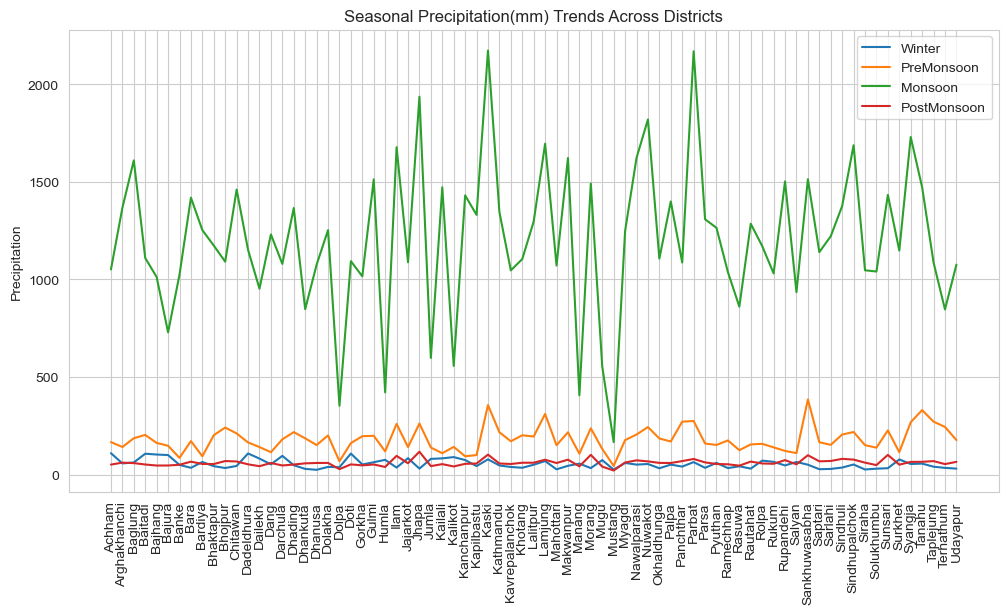

In [34]:
##Plot for Seasonal Precipitation(mm) Trends Across Districts

plt.figure(figsize=(12, 6))
for season in ["Precip_Winter", "Precip_PreMonsoon", "Precip_Monsoon", "Precip_PostMonsoon"]:
    plt.plot(gdf["District"], gdf[season], label=season.replace("Precip_", ""))

plt.xticks(rotation=90)
plt.title("Seasonal Precipitation(mm) Trends Across Districts")
plt.ylabel("Precipitation")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_5884\1233421851.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Dell\AppData\Local\Temp\ipykernel_5884\1233421851.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



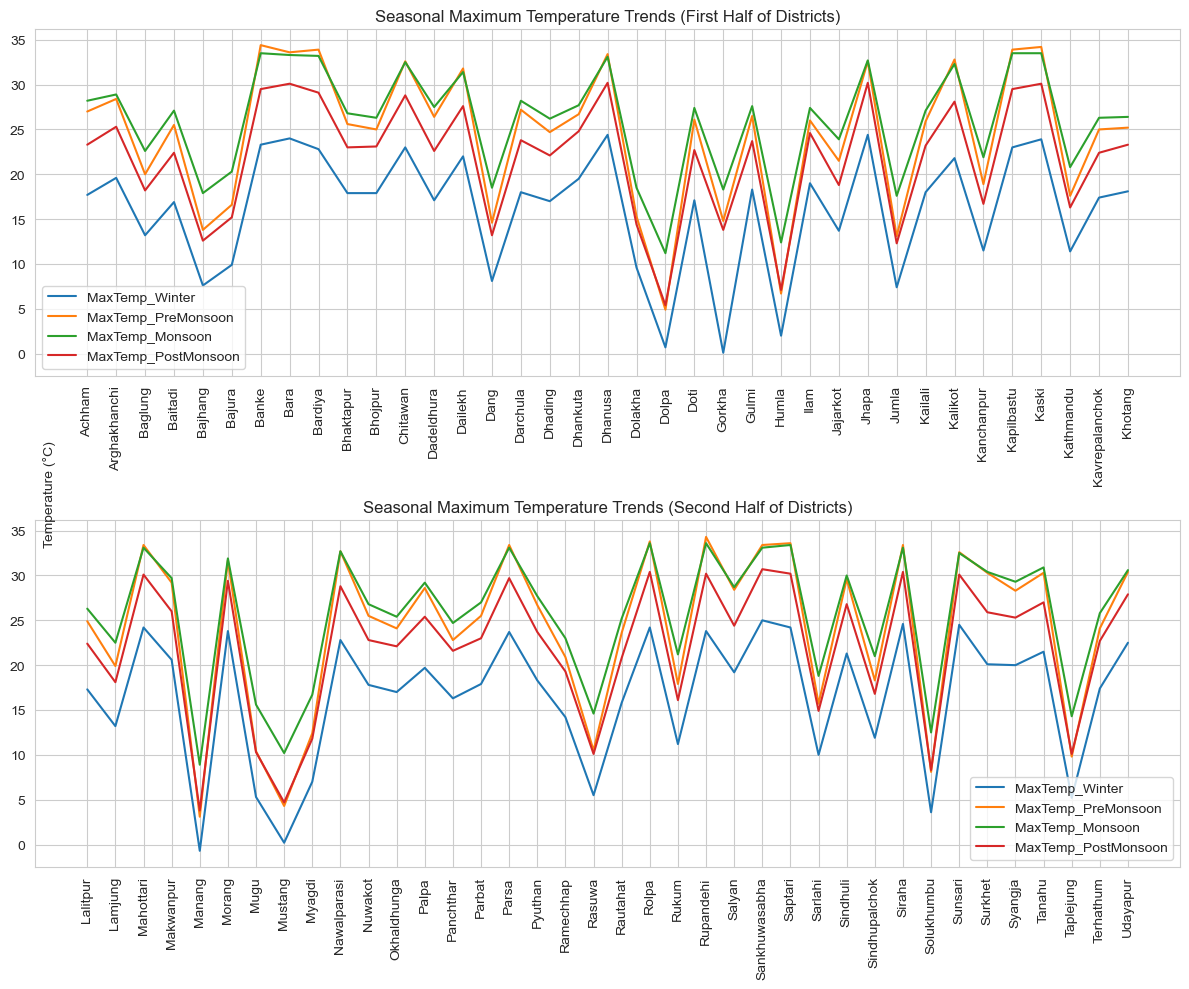

In [35]:
##Plot for Seasonal Maximum Temperature Trends Across Districts 

districts = gdf["District"]

# Split data into two halves
midpoint = len(districts) // 2
first_half = gdf.iloc[:midpoint]
second_half = gdf.iloc[midpoint:]

# Create figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharey=True)

# Define seasons
seasons = ["MaxTemp_Winter", "MaxTemp_PreMonsoon", "MaxTemp_Monsoon", "MaxTemp_PostMonsoon"]

# First plot (first half of districts)
for season in seasons:
    axes[0].plot(first_half["District"], first_half[season], label=season.replace("MinTemp_", ""))

axes[0].set_xticklabels(first_half["District"], rotation=90)
axes[0].set_title("Seasonal Maximum Temperature Trends (First Half of Districts)")
axes[0].legend()
axes[0].grid(True)

# Second plot (second half of districts)
for season in seasons:
    axes[1].plot(second_half["District"], second_half[season], label=season.replace("MinTemp_", ""))

axes[1].set_xticklabels(second_half["District"], rotation=90)
axes[1].set_title("Seasonal Maximum Temperature Trends (Second Half of Districts)")
axes[1].legend()
axes[1].grid(True)

# Set common Y-axis label
fig.text(0.04, 0.5, "Temperature (°C)", va="center", rotation="vertical")

# Show the plots
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_5884\307877318.py:19: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Dell\AppData\Local\Temp\ipykernel_5884\307877318.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



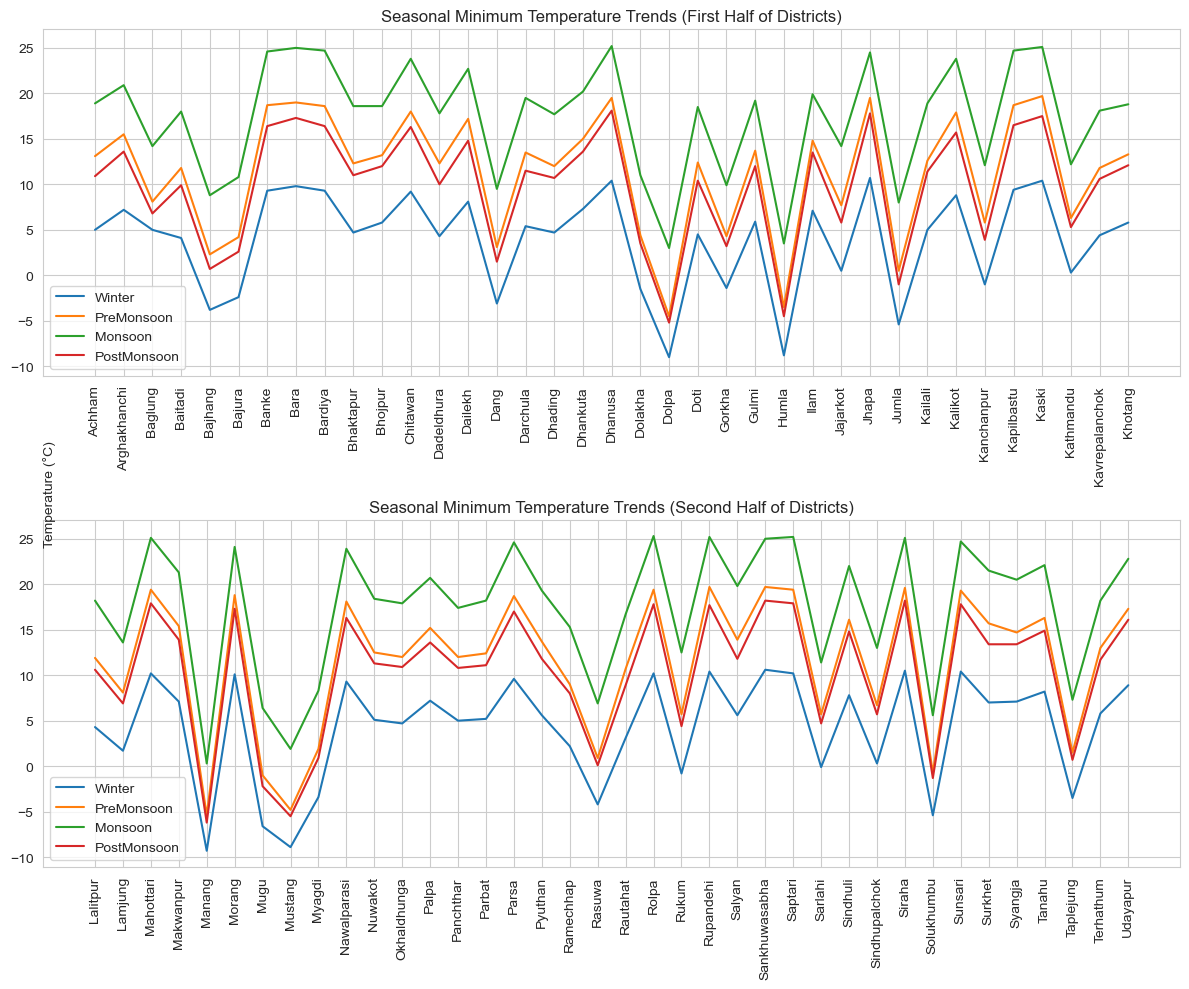

In [36]:
##Plot for Seasonal Minimum Temperature Trends Across Districts 
districts = gdf["District"]

# Split data into two halves
midpoint = len(districts) // 2
first_half = gdf.iloc[:midpoint]
second_half = gdf.iloc[midpoint:]

# Create figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharey=True)

# Define seasons
seasons = ["MinTemp_Winter", "MinTemp_PreMonsoon", "MinTemp_Monsoon", "MinTemp_PostMonsoon"]

# First plot (first half of districts)
for season in seasons:
    axes[0].plot(first_half["District"], first_half[season], label=season.replace("MinTemp_", ""))

axes[0].set_xticklabels(first_half["District"], rotation=90)
axes[0].set_title("Seasonal Minimum Temperature Trends (First Half of Districts)")
axes[0].legend()
axes[0].grid(True)

# Second plot (second half of districts)
for season in seasons:
    axes[1].plot(second_half["District"], second_half[season], label=season.replace("MinTemp_", ""))

axes[1].set_xticklabels(second_half["District"], rotation=90)
axes[1].set_title("Seasonal Minimum Temperature Trends (Second Half of Districts)")
axes[1].legend()
axes[1].grid(True)

# Set common Y-axis label
fig.text(0.04, 0.5, "Temperature (°C)", va="center", rotation="vertical")

# Show the plots
plt.tight_layout()
plt.show()

INTERACTIVE PLOT USING PLOTLY FOR BETTER UNDERSTANDING 

In [37]:

##Annual Precipitation(mm) Trends Across Districts

fig=px.line (gdf,x="District",y="Precip_Annual",
             title="Annual Precipitation(mm) Trends Across Districts",markers=True,
             labels={"Precip_Annual":"Precipitation(mm)"},
             hover_data={"District":True,"Precip_Annual":True})
             
        
fig.update_traces(marker=dict(size=10,color='blue'),line=dict(color='blue'))

fig.update_layout(
  xaxis=dict(tickangle=90,showgrid=True),
  yaxis=dict(showgrid=True)
)

fig.show()

            
             


In [38]:
#Annual Maximum Temperature Trend Across Districts

# Create interactive plot
fig = px.line(gdf, x="District", y="MaxTemp_Annual", markers=True,
              title="Annual Maximum Temperature Trend Across Districts",
              labels={"MaxTemp_Annual": "Temperature(°C) "},
              hover_data={"District": True, "MaxTemp_Annual": True})

fig.update_traces(marker=dict(size=10, color="blue"), line=dict(color="blue"))

# Corrected Layout
fig.update_layout(
    xaxis=dict(tickangle=90, showgrid=True),  
    yaxis=dict(showgrid=True)
)

fig.show()

In [39]:
#Annual Minimum Temperature Trend Across Districts

fig=px.line(gdf,x="District",y="MinTemp_Annual",markers=True,
            title="Annual Minimum Temperature Trend Across Districts",
            labels={"MinTemp_Annual":"Temperature(°C)"},
            hover_data={"District":True,"MinTemp_Annual":True})
fig.update_traces(marker=dict(size=10,color='blue'),line=dict(color='blue'))

fig.update_layout(
    xaxis=dict(tickangle=90,showgrid=True),
    yaxis=dict(showgrid=True)
)

fig.show()

BAR PLOTS FOR AVERAGE SEASONAL DATA

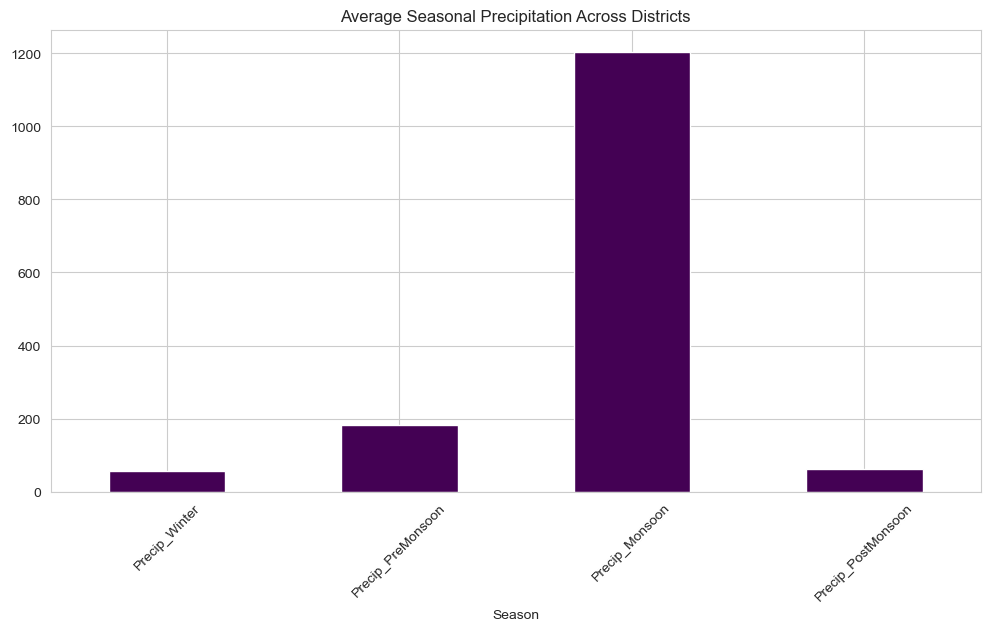

In [40]:

# Set the style
sns.set_style("whitegrid")

# Bar Chart: Seasonal Precipitation
plt.figure(figsize=(12, 6))
gdf.set_index("District")[["Precip_Winter", "Precip_PreMonsoon", "Precip_Monsoon", "Precip_PostMonsoon"]].mean().plot(kind='bar', colormap='viridis')
plt.title("Average Seasonal Precipitation Across Districts")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.show()


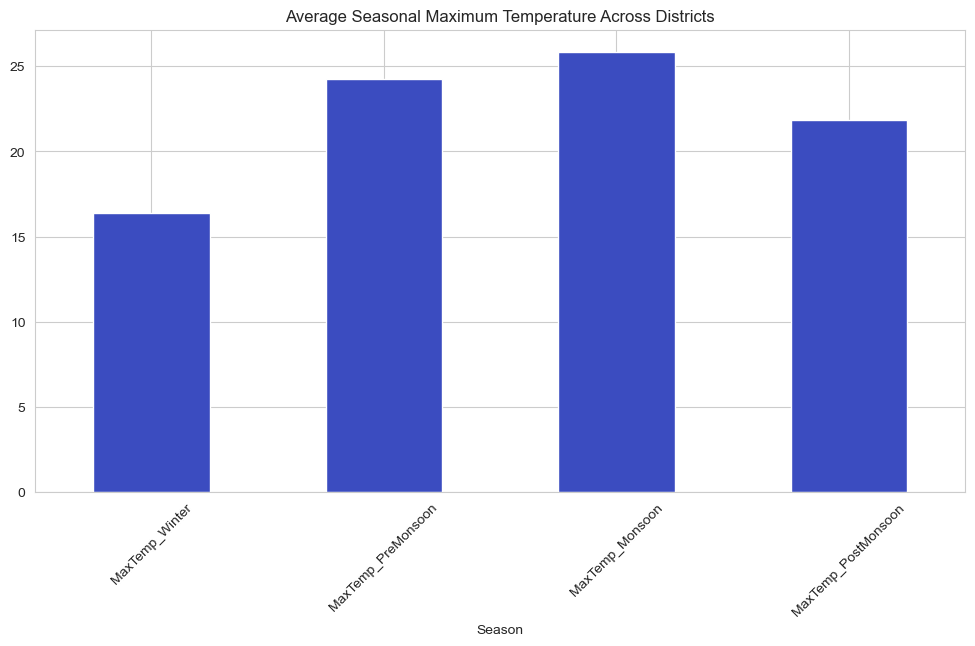

In [41]:
plt.figure(figsize=(12, 6))
gdf.set_index("District")[["MaxTemp_Winter", "MaxTemp_PreMonsoon", "MaxTemp_Monsoon", "MaxTemp_PostMonsoon"]].mean().plot(kind='bar', colormap='coolwarm')
plt.title("Average Seasonal Maximum Temperature Across Districts")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.show()

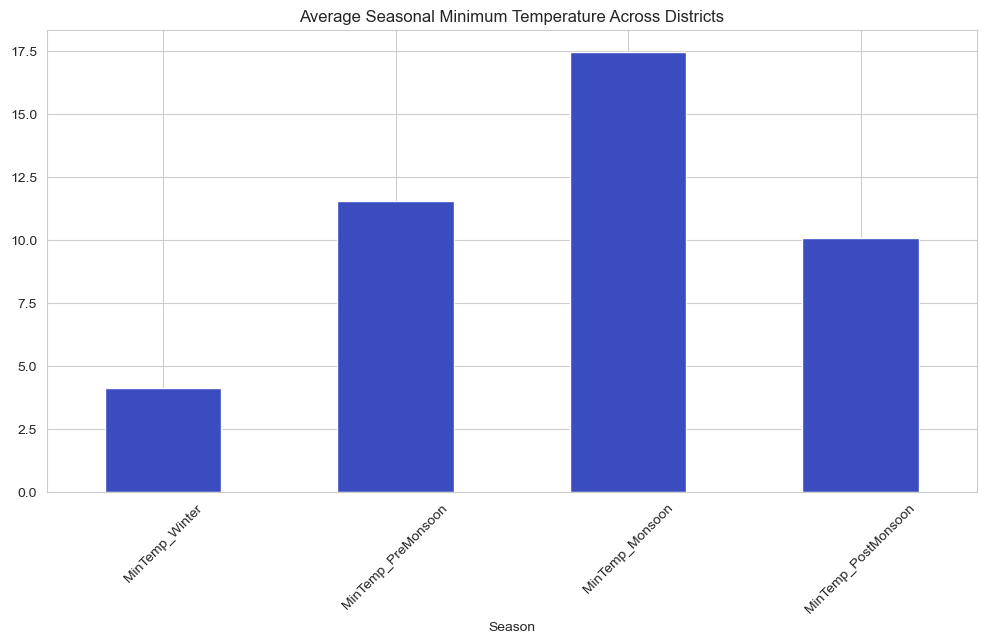

In [42]:
plt.figure(figsize=(12, 6))
gdf.set_index("District")[["MinTemp_Winter", "MinTemp_PreMonsoon", "MinTemp_Monsoon", "MinTemp_PostMonsoon"]].mean().plot(kind='bar', colormap='coolwarm')
plt.title("Average Seasonal Minimum Temperature Across Districts")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.show()

BOX PLOTS FOR VARIABILITY 

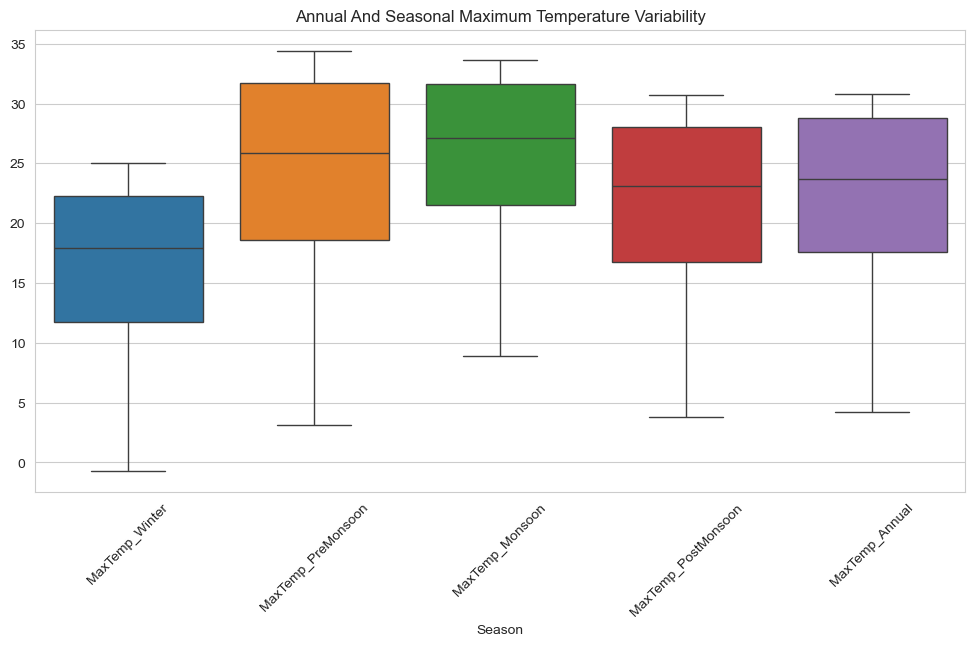

In [43]:
#Box Plot: Maximum Temperature Variability
plt.figure(figsize=(12, 6))
sns.boxplot(data=gdf[["MaxTemp_Winter", "MaxTemp_PreMonsoon", "MaxTemp_Monsoon", "MaxTemp_PostMonsoon","MaxTemp_Annual"]])
plt.title("Annual And Seasonal Maximum Temperature Variability")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.show()

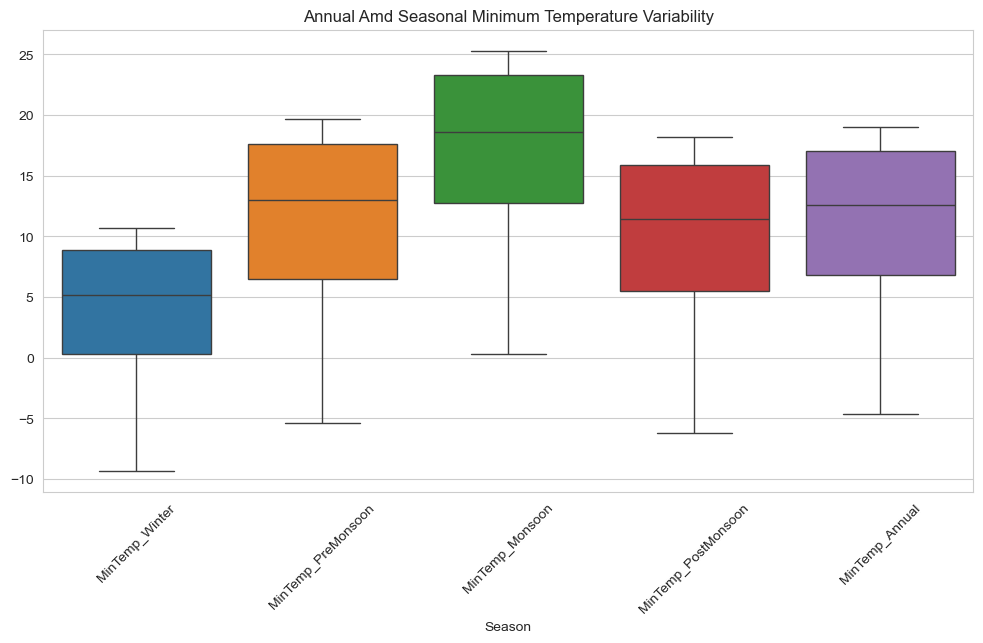

In [44]:
#Box Plot: Minimum Temperature Variability
plt.figure(figsize=(12, 6))
sns.boxplot(data=gdf[["MinTemp_Winter", "MinTemp_PreMonsoon", "MinTemp_Monsoon", "MinTemp_PostMonsoon","MinTemp_Annual"]])
plt.title("Annual Amd Seasonal Minimum Temperature Variability")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.show()

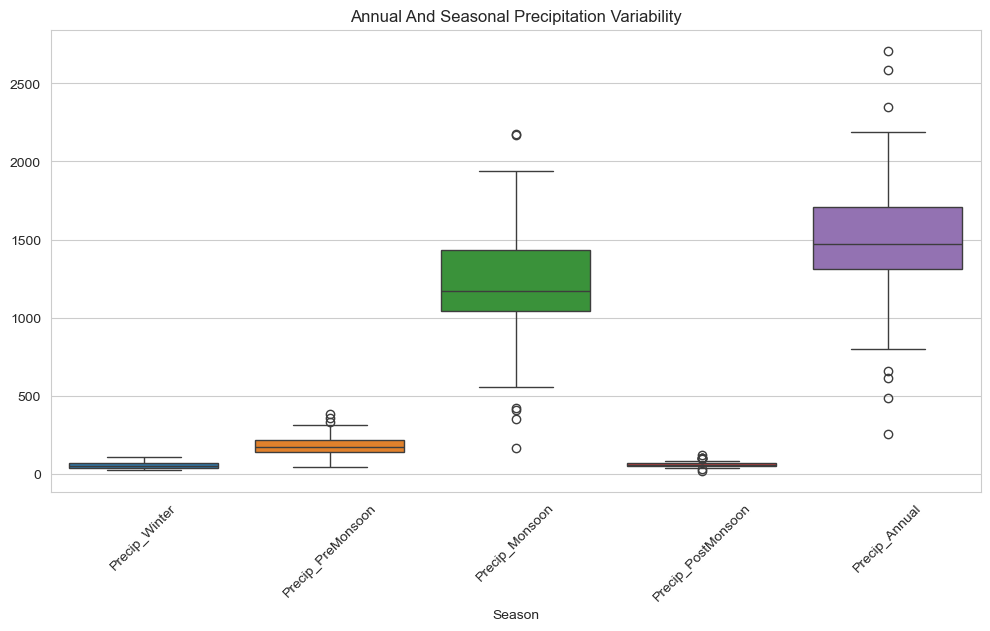

In [45]:
#Box Plot: Precipitation Variability
plt.figure(figsize=(12, 6))
sns.boxplot(data=gdf[["Precip_Winter", "Precip_PreMonsoon", "Precip_Monsoon", "Precip_PostMonsoon","Precip_Annual"]])
plt.title("Annual And Seasonal Precipitation Variability")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.show()


HEAT MAP OF THE CLIMATE VARIABLES 

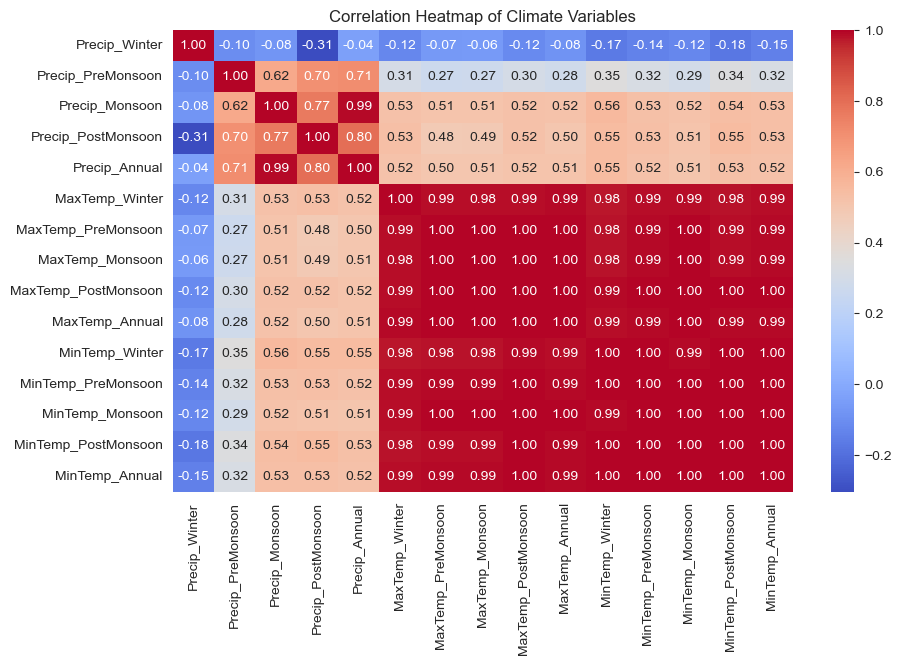

In [46]:
#Heatmap: Correlation Between Climate Variables
plt.figure(figsize=(10, 6))
sns.heatmap(gdf[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Climate Variables")
plt.show()

VISUALIZATION FOR PHYSIOGRAPHICAL DATA

Preprating data for the visualization 


In [47]:
# Use the first row as the header, then read the data correctly
physiographic_data.columns = physiographic_data.iloc[0]  # Set first row as column names
physiographic_data = physiographic_data.iloc[1:].reset_index(drop=True)  # Remove first row

# Ensure column names are correctly assigned
physiographic_data.columns = [
    "Physiographic Region", "Precip_Winter", "Precip_PreMonsoon", "Precip_Monsoon", "Precip_PostMonsoon", "Precip_Annual",
    "MaxTemp_Winter", "MaxTemp_PreMonsoon", "MaxTemp_Monsoon", "MaxTemp_PostMonsoon", "MaxTemp_Annual",
    "MinTemp_Winter", "MinTemp_PreMonsoon", "MinTemp_Monsoon", "MinTemp_PostMonsoon", "MinTemp_Annual", "geometry"
]

# Convert numeric columns to proper data types
numeric_columns = physiographic_data.columns[1:-1]  # Excluding Physiographic region and geometry

physiographic_data[numeric_columns] = physiographic_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check cleaned data
physiographic_data.head()







,Physiographic Region,Precip_Winter,Precip_PreMonsoon,Precip_Monsoon,Precip_PostMonsoon,Precip_Annual,MaxTemp_Winter,MaxTemp_PreMonsoon,MaxTemp_Monsoon,MaxTemp_PostMonsoon,MaxTemp_Annual,MinTemp_Winter,MinTemp_PreMonsoon,MinTemp_Monsoon,MinTemp_PostMonsoon,MinTemp_Annual,geometry
0,High Himalayas,49.6,105.4,502.9,36.5,694.2,11.8,18.5,21.5,16.9,17.6,-9.1,-4.8,2.0,-5.5,-3.8,None
1,High Mountains,72.6,202.7,1189.8,62.9,1527.9,11.8,18.5,21.5,16.9,17.6,-0.2,6.4,12.8,5.0,6.6,None
2,Mid Mountain,60.2,212.9,1292.7,61.7,1627.4,18.6,26.8,27.8,23.9,24.6,5.8,13.6,19.4,12.0,13.3,None
3,Siwaliks,52.0,160.9,1426.3,69.4,1708.5,22.6,32.5,32.4,28.5,29.3,8.9,17.7,23.5,15.9,17.1,None
4,Terai,41.7,149.5,1339.1,70.2,1600.4,23.9,34.1,33.9,30.3,30.8,10.3,19.5,25.2,17.7,18.8,None


C:\Users\Dell\AppData\Local\Temp\ipykernel_5884\3393734591.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




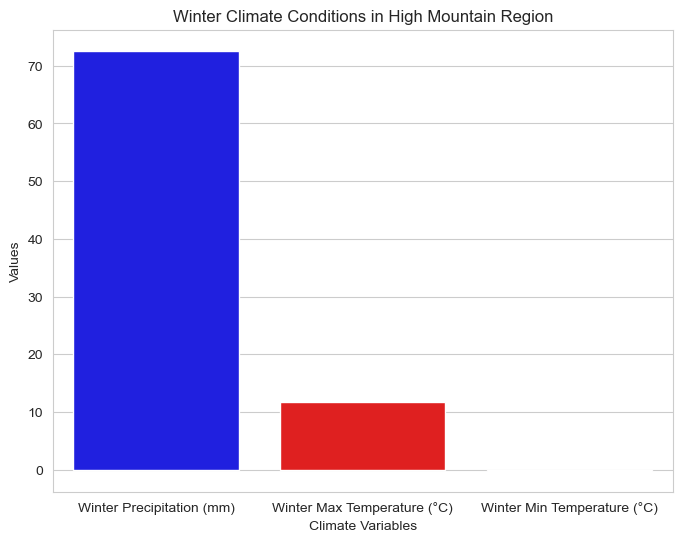

In [48]:

# Filter data for High Mountain region
high_mountain = physiographic_data[physiographic_data["Physiographic Region"] == "High Mountains"]

# Data to plot
data = {
    "Winter Precipitation (mm)": high_mountain["Precip_Winter"].values[0],
    "Winter Max Temperature (°C)": high_mountain["MaxTemp_Winter"].values[0],
    "Winter Min Temperature (°C)": high_mountain["MinTemp_Winter"].values[0]
}

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(data.keys()), y=list(data.values()), palette=["blue", "red", "purple"])

# Add title and labels
plt.title("Winter Climate Conditions in High Mountain Region")
plt.ylabel("Values")
plt.xlabel("Climate Variables")

# Show the plot
plt.show()



C:\Users\Dell\AppData\Local\Temp\ipykernel_5884\2811914430.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Dell\AppData\Local\Temp\ipykernel_5884\2811914430.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Dell\AppData\Local\Temp\ipykernel_5884\2811914430.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Dell\AppData\Local\Temp\ipykernel_5884\2811914430.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Dell\AppData\Local\Temp\ipykernel_5884\2811914430.py:18: FutureWarning:



Passing `palette` witho

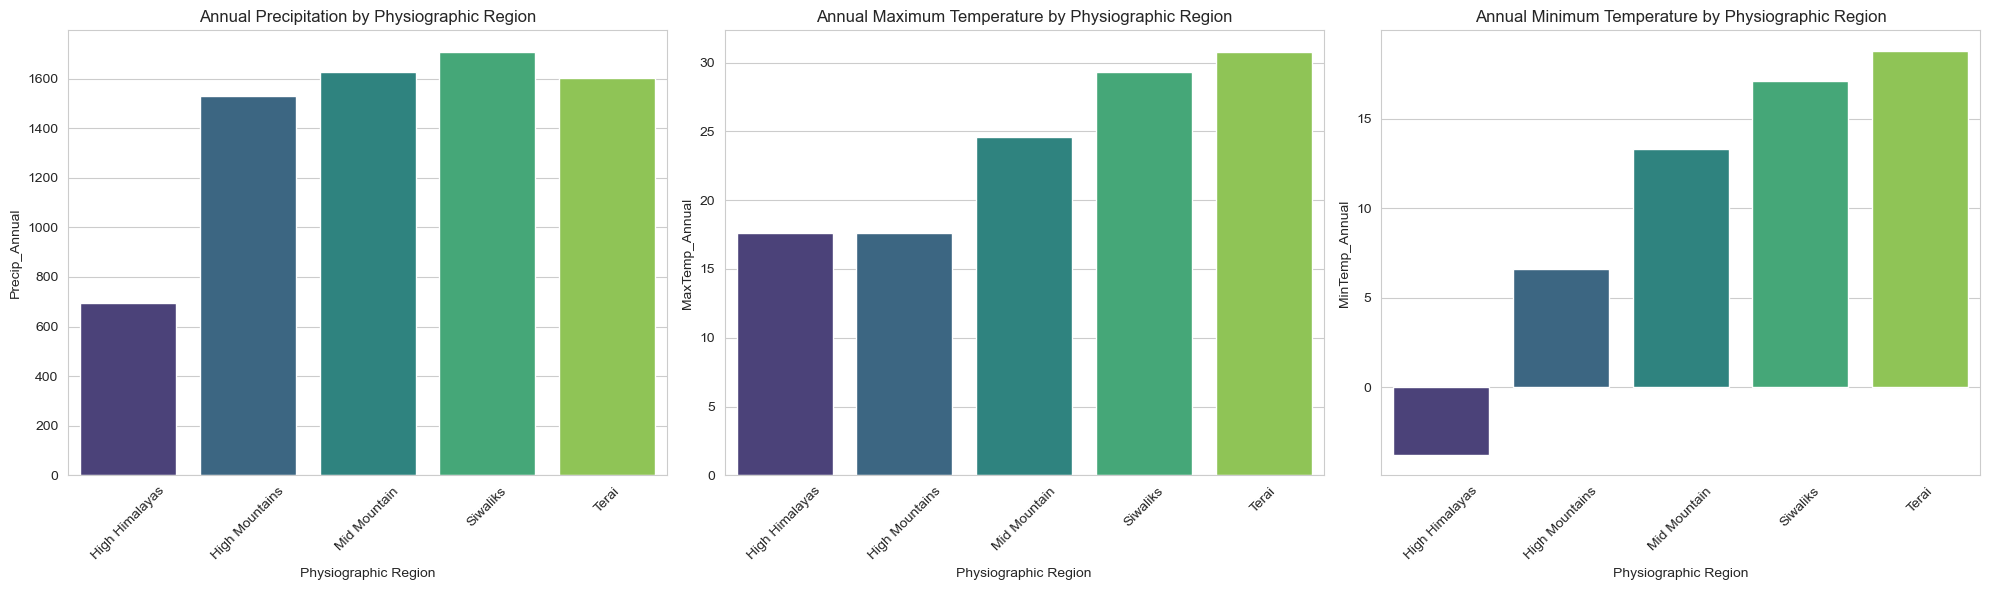

In [49]:
# Set figure size and create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Define color palette
palette = "viridis"

# Barplot for Annual Precipitation
sns.barplot(x="Physiographic Region", y="Precip_Annual", data=physiographic_data, palette=palette, ax=axes[0])
axes[0].set_title("Annual Precipitation by Physiographic Region")
axes[0].set_xticklabels(physiographic_data["Physiographic Region"], rotation=45)

# Barplot for Maximum Annual Temperature
sns.barplot(x="Physiographic Region", y="MaxTemp_Annual", data=physiographic_data, palette=palette, ax=axes[1])
axes[1].set_title("Annual Maximum Temperature by Physiographic Region")
axes[1].set_xticklabels(physiographic_data["Physiographic Region"], rotation=45)

# Barplot for Minimum Annual Temperature
sns.barplot(x="Physiographic Region", y="MinTemp_Annual", data=physiographic_data, palette=palette, ax=axes[2])
axes[2].set_title("Annual Minimum Temperature by Physiographic Region")
axes[2].set_xticklabels(physiographic_data["Physiographic Region"], rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

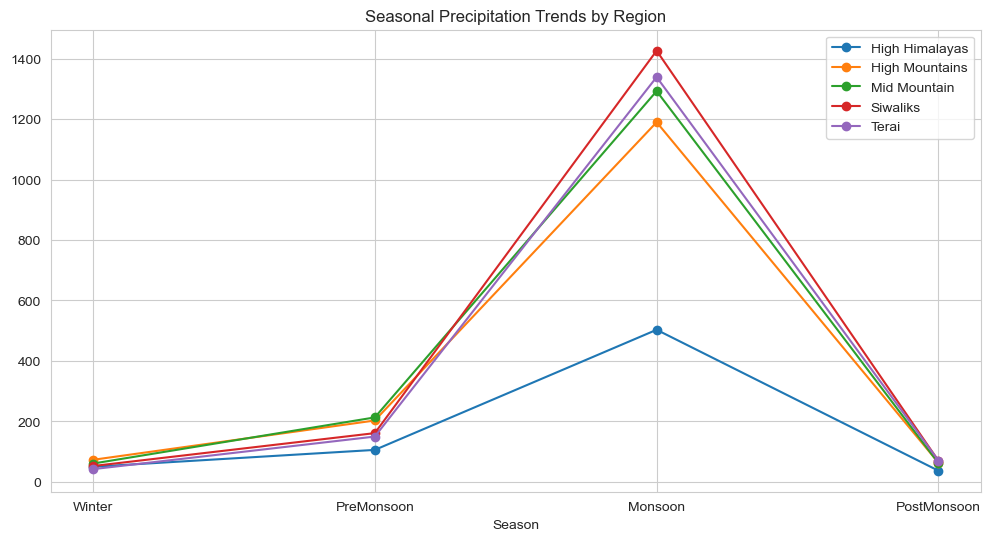

In [50]:
plt.figure(figsize=(12, 6))
for region in physiographic_data["Physiographic Region"].unique():
    subset = physiographic_data[physiographic_data["Physiographic Region"] == region]
    plt.plot(["Winter", "PreMonsoon", "Monsoon", "PostMonsoon"], 
             subset.iloc[0, 1:5].values, marker="o", label=region)

plt.xlabel("Season")

plt.title("Seasonal Precipitation Trends by Region")
plt.legend()
plt.show()


SIMPLE EXPLORATORY DATA ANALYSIS OF THE GIS DATA

In [51]:
##For the shape_file 

# Inspect the geometry column (geometries in vector data)
print(shapefile_data.geometry.head())


# Get the coordinate reference system (CRS)
print("CRS:",shapefile_data.crs)


# View the extent (bounding box) of the data
print("Bounding Box:", shapefile_data.total_bounds)

#Finding the missing values in the vector data  and if there is print the total no of missing values
print(shapefile_data.isnull().sum())
print(shapefile_data.isnull().sum().sum())



0    POLYGON ((91138.076 3196071.101, 91131.738 319...
1    POLYGON ((126458.914 3111104.755, 126420.917 3...
2    POLYGON ((330182.734 3052935.622, 330172.338 3...
3    POLYGON ((-118546.229 3182243.058, -118535.005...
4    POLYGON ((89734.088 3093838.21, 89693.709 3093...
Name: geometry, dtype: geometry
CRS: EPSG:32645
Bounding Box: [-177535.12581693 2914248.42258544  618317.94201535 3380666.24303393]
OBJECTID      0
State         0
State_Code    0
District      0
Center        9
Area_SQKM     0
geometry      0
dtype: int64
9


In [52]:
##For the GeoJSON datafile 

# Inspect the geometry column (geometries in vector data)
print(district_data.geometry.head())


# Get the coordinate reference system (CRS)
print("CRS:",district_data.crs)


# View the extent (bounding box) of the data
print("Bounding Box:", district_data.total_bounds)

#Finding the missing values in the vector data  and if there is print the total no of missing values
print(district_data.isnull().sum())
print(district_data.isnull().sum().sum())


0    None
1    None
2    None
3    None
4    None
Name: geometry, dtype: geometry
CRS: EPSG:4326
Bounding Box: [nan nan nan nan]
District                0
Precip_Winter           0
Precip_PreMonsoon       0
Precip_Monsoon          0
Precip_PostMonsoon      0
Precip_Annual           0
MaxTemp_Winter          0
MaxTemp_PreMonsoon      0
MaxTemp_Monsoon         0
MaxTemp_PostMonsoon     0
MaxTemp_Annual          0
MinTemp_Winter          0
MinTemp_PreMonsoon      0
MinTemp_Monsoon         0
MinTemp_PostMonsoon     0
MinTemp_Annual          0
geometry               76
dtype: int64
76


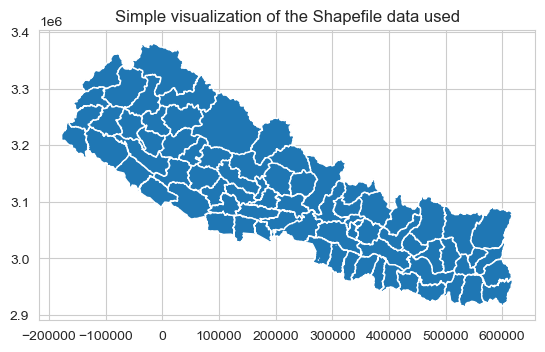

In [53]:
shapefile_data.plot()
plt.title("Simple visualization of the Shapefile data used")
plt.show()

WORKING WITH GEOMETRICS IN VECTOR DATA


In [54]:
# Inspect the geometry types (point, polygon, etc.)
print("Geometry Types:", shapefile_data.geometry.type.value_counts())


# Check the area of polygons (if your data contains polygons)
shapefile_data['area'] = shapefile_data.geometry.area
print("Area of the first few features:", shapefile_data['area'].head())

shapefile_data = shapefile_data.to_crs("epsg=32644") #Calculations of areas and distances based on such geographic CRS(EPSG:4326) can be inaccurate because they don't account for the curvature of the Earth. 
#CRS that is suitable for Nepal,  EPSG:32644 (WGS 84 / UTM zone 44N), which is a projected CRS used for Nepal.


# Check the bounds of the geometries
print("Bounds of the first few features:")
shapefile_data.geometry.bounds

Geometry Types: Polygon    77
Name: count, dtype: int64
Area of the first few features: 0    7.967352e+09
1    1.110581e+09
2    4.134526e+08
3    3.311975e+09
4    1.325103e+09
Name: area, dtype: float64


CRSError: Invalid projection: epsg=32644 type=crs: (Internal Proj Error: proj_create: unrecognized format / unknown name)

In [55]:
#Some of distamce based statistics


point_1 = shapefile_data.iloc[0]
# Calculate the distance to all other points
distances = shapefile_data.distance(point_1.geometry)

# Show distances
print("Distances from the first point to others:")
print(distances)


Distances from the first point to others:
0          0.000000
1      50880.504578
2     205645.721594
3     114195.704720
4      44597.395299
          ...      
72    246152.217351
73    118503.270619
74    105861.285837
75     70377.065394
76    372690.375247
Length: 77, dtype: float64


In [56]:
# Density statistics


# Calculate the area of the bounding box (in the CRS units)
bbox_area = shapefile_data.total_bounds[2] - shapefile_data.total_bounds[0]  # width (xmax - xmin)
bbox_area1= shapefile_data.total_bounds[3] - shapefile_data.total_bounds[1]  # height (ymax - ymin)
print(bbox_area)
print(bbox_area1)

point_density = len(shapefile_data) / bbox_area
print(f"Point Density: {point_density} points per unit area")


795853.0678322841
466417.8204484889
Point Density: 9.675152752722286e-05 points per unit area
